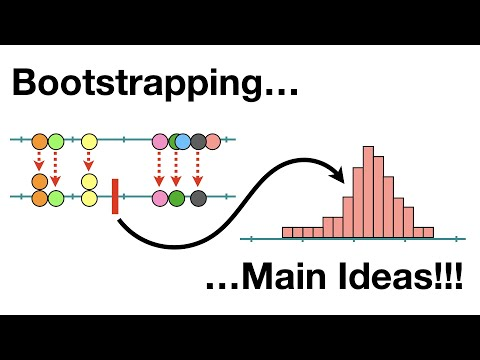

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

# 1.
The standard deviation measures how spread out the individual data points are in the original dataset from the mean, regardless of sample size. The standard error of the mean is the standard deviation of sample means obtained from bootstrapped samples, and it reflects the precision of the estimate of the the true population mean. SEM decreases as the sample size increases, since larger samples tend to provide a more accurate estimate of the mean.

# 2.
Since approximately 95% of the data falls within 2 standard deviations from the mean, and the standard error of the mean is the standard deviation of the bootstrapped sample mean, hence I can take the mean of the sample means and $\pm$ 2 standard errors to get the comfidence interval.

# 3.
The 95% confidence interval can also be created by arranging all the bootstrapped means in ascending order and then identify the 2.5 percentile (where 2.5% of the values are less than this) and 97.5 percentile (where 97.5% of the values are less than this). The confidence interval is the range between these percentiles.

# 4.

In [9]:
import numpy as np

# Step 1: Generate a sample of data (assuming a normal distribution for simplicity)
np.random.seed(42)  # For reproducibility
sample_size = 100
population_mean = 50
population_std = 10
sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

# Step 2: Define a function to perform bootstrapping and calculate a 95% confidence interval
def bootstrap_confidence_interval(data, n_bootstraps=1000, confidence_level=0.95):
    bootstrapped_means = []
    
    # Step 3: Perform bootstrapping by sampling with replacement and computing the mean
    for _ in range(n_bootstraps):
        boot_sample = np.random.choice(data, size=len(data), replace=True)
        boot_mean = np.mean(boot_sample) # changing this line to calculate a different population parameter, for example change this to np.median(boot_sample) to get the population median
        bootstrapped_means.append(boot_mean)
    
    # Step 4: Calculate the lower and upper percentiles for the confidence interval
    lower_percentile = (1 - confidence_level) / 2 * 100
    upper_percentile = (1 + confidence_level) / 2 * 100
    confidence_interval = np.percentile(bootstrapped_means, [lower_percentile, upper_percentile])
    
    return confidence_interval

# Step 5: Call the function to generate the 95% bootstrap confidence interval
ci_95 = bootstrap_confidence_interval(sample)
ci_95

array([47.27663575, 50.62851486])

# 5.
Because the population perameter is typically unknown as it is impractical or impossible to measure. Hence we typically estimate the true value of the unknown population parameter by calculating it from a sample, and the 95% confidence interval provides a range of values where the true population parameter is likely to be, this interval accounts for uncertainty as the sample is only a subset of the population and is subject to sampling variability. By making the distinction clear, it avoids misinterpretation of the sample statistic as a population parameter rather than an estimate of the population parameter that cannot be known.

# 6.
1. First create a bootstrap sample same size of the original by ramdomly drawing from the original dataset with replacement (putting it back aftering drawing) so that the chances of each draw is the same. Then calculate the desired statistic for the sample. Repeat this process multiple times to create a distribution of the calculated statistic and use this distribution to estimate the population parameter.
2. The main purpose of bootstraping is to estimate the population parameter by creating a confidence interval when it is impractical to collect data on the entire population.
3. Create bootstrapped samples by drawing from the original sample with replacement and calculate the average of the sample, repeat this process multiple times to create a distribution. Then calculate the standard deviation of the distribution (standard error of the mean SEM) using the formula $SEM=\frac{\sigma}{\sqrt{n}}$, check if the hypothesized average lies within the range of $\pm2SEM$ from then mean of the distribution.

# 7.
The confidence interval provides a range of plausible values for the true effect of the drug, since the confidence interval includes zero, zero is a possible value for the true effect of the drug. Although the sample mean statistic is not zero, the data is strong enough to exclude the possibility of the effect of the drug being zero, therefore we cannot reject that the drug has no effect on average. The null hypothesis would be rejected if the confidence interval does not include zero, which provides evidence that the drug has an effect (either beneficial or harmful).

# Chatbot Summary
Here’s a concise summary of our exchanges:

Standard Error vs. Standard Deviation: We discussed that the standard deviation measures the variability of data points, while the standard error of the mean (SEM) measures the precision of the sample mean as an estimate of the population mean.

Confidence Intervals Using SEM: We reviewed how a 95% confidence interval for the population mean can be constructed using the SEM and the Z-score (1.96) for a 95% confidence level.

Bootstrapping Confidence Intervals: I explained how to construct a 95% confidence interval using bootstrapped means via the percentile method, without relying on SEM, and provided Python code to generate such an interval.

Distinguishing Population Parameter vs. Sample Statistic: We covered why it's essential to distinguish between the population parameter (e.g., population mean) and the sample statistic (e.g., sample mean) when interpreting confidence intervals.

Hypothesis Testing and Confidence Intervals: We discussed why a confidence interval that includes zero fails to reject the null hypothesis and how a confidence interval that excludes zero leads to rejecting the null hypothesis (indicating an effect).

This summary captures the key points discussed for your assignment.

Link: https://chatgpt.com/share/66fdbc38-1860-8011-a2de-a0d5d3b224ee

# 8.

In [10]:
import pandas as pd

# Creating a dictionary from the provided data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Creating a DataFrame
df = pd.DataFrame(data)

df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

df.head()

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore,ScoreDifference
0,1,45,M,84,86,2
1,2,34,F,78,86,8
2,3,29,M,83,80,-3
3,4,52,F,81,86,5
4,5,37,M,81,84,3


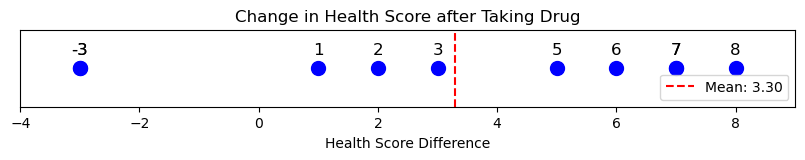

In [11]:
import matplotlib.pyplot as plt

# Creating a number line plot
plt.figure(figsize=(10, 1))
plt.scatter(df['ScoreDifference'], [1]*len(df['ScoreDifference']), color='blue', s=100)

# Adding labels
for i, score in enumerate(df['ScoreDifference']):
    plt.text(score, 1.02, f"{score}", ha='center', fontsize=12)

# Adjusting plot aesthetics
plt.yticks([])
plt.title("Change in Health Score after Taking Drug")
plt.xlabel("Health Score Difference")
plt.xlim(min(df['ScoreDifference']) - 1, max(df['ScoreDifference']) + 1)

m = df['ScoreDifference'].mean()
plt.axvline(m, color='red', linestyle='--', label=f'Mean: {m:.2f}')

# Display the plot
plt.legend(loc='lower right')
plt.show()

In order to quantify the effect of the vaccine, I took the difference in health scores of the people that took the vaccine before and after taking the vaccine. As seen in the plot above, the majority of people's health scores improved after taking the vaccine with an average improvement of 3.30. However, the sample size is really small, further analysis is required in order to verify whether the vaccine has any effect (i.e. a positive change in health score after taking the vaccine).

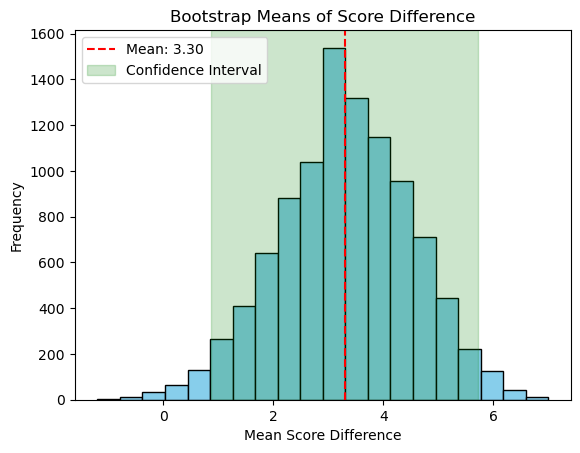

Bootstrap Mean: 3.2997299729972998
±2 Standard Deviations: [0.870724885529937, 5.728735060464663]


In [22]:
import numpy as np

# Function to perform bootstrapping
def bootstrap(data, num_samples, num_iterations):
    means = []
    np.random.seed(10)
    for _ in range(num_iterations):
        sample = np.random.choice(data, size=num_samples, replace=True)
        means.append(np.mean(sample))
    return means

# Perform bootstrapping
num_iterations = 9999
score_difference = df['ScoreDifference']
bootstrap_means = bootstrap(score_difference, len(score_difference), num_iterations)

# Calculate the mean and standard deviation of the bootstrapped means
mean_bootstrap = np.mean(bootstrap_means)
std_bootstrap = np.std(bootstrap_means)

# Plotting the histogram of bootstrap means
plt.hist(bootstrap_means, bins=20, color='skyblue', edgecolor='black')
plt.title("Bootstrap Means of Score Difference")
plt.xlabel("Mean Score Difference")
plt.ylabel("Frequency")

# Annotating the mean
plt.axvline(mean_bootstrap, color='red', linestyle='--', label=f'Mean: {mean_bootstrap:.2f}')

# Annotating ±2 standard deviations from the bootstrapped mean
lower_bound = mean_bootstrap - 2 * std_bootstrap
upper_bound = mean_bootstrap + 2 * std_bootstrap

plt.axvspan(xmin=lower_bound, xmax=upper_bound, color='green', alpha=0.2, label='Confidence Interval')

# Adding a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

# Print the mean and the bounds
print(f"Bootstrap Mean: {mean_bootstrap}")
print(f"±2 Standard Deviations: [{lower_bound}, {upper_bound}]")

As seen in the histogram above, zero lies outside of the confidence interval, hence we can conclude that the vaccine has a positive effect on people's health.

# ChatBot Summary
In our interactions, we started by working with patient health data, where I helped create a CSV file from a given dataset using Python. We then calculated a new column, ScoreDifference, and plotted it on a number line. Afterward, I added an annotation for the mean to the plot. Finally, I provided Python code to perform bootstrapping on the ScoreDifference data, generate a histogram of bootstrapped means, and annotate the plot with ±2 standard deviations from the bootstrapped mean as well as the true mean.

Link: https://chatgpt.com/share/66fdccd5-1148-8011-909e-5e0e2faa0a6d

# 9.
Yes I interacted with a ChatBot